# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 4__

__Nombres de los estudiantes: Carlos Tardón Rubio y Carlos Morán Alfonso__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
random_state = 50
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.cluster as skc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [2]:
df_bnb = pd.read_csv('airbnb.csv')
df_bnb

accommodates  bathrooms  bedrooms  guests_included  \
0                 4        2.0       2.0                1   
1                 4        1.0       2.0                2   
2                 2        1.0       1.0                1   
3                 2        1.0       1.0                1   
4                 2        1.0       1.0                1   
...             ...        ...       ...              ...   
14993             2        1.0       1.0                1   
14994             4        1.0       2.0                1   
14995             2        1.0       1.0                1   
14996             3        1.0       1.0                1   
14997             2        1.0       1.0                1   

       host_listings_count   latitude  longitude  minimum_nights  \
0                      1.0  52.358466   4.933843               2   
1                      1.0  52.363589   4.983353               3   
2                      1.0  52.375209   4.861647               3   
3                      1.0  52.387382   4.890457               2   
4                      1.0  52.384062   4.889877               3   
...                    ...        ...        ...             ...   
14993                 43.0  52.382970   4.873389               3   
14994                  1.0  52.347479   4.833644               4   
14995                  1.0  52.370400   4.918489               1   
14996                  1.0  52.389637   4.879580               2   
14997                  1.0  52.365212   4.868335               1   

       number_of_reviews  distance_centre  instant_bookable  entire_home  \
0                      8         3.279483                 0            1   
1                      0         5.951843                 0            1   
2                      8         2.601055                 0            1   
3                     41         1.095138                 0            0   
4                      0         0.844491                 0            1   
...                  ...              ...               ...          ...   
14993                 10         1.815773                 0            1   
14994                  2         5.687407                 1            1   
14995                  5         1.620395                 0            1   
14996                  7         1.777881                 0            1   
14997                  2         2.619788                 0            1   

       private_room  shared_room  price  
0                 0            0  160.0  
1                 0            0  120.0  
2                 0            0   99.0  
3                 1            0  100.0  
4                 0            0  175.0  
...             ...          ...    ...  
14993             0            0  140.0  
14994             0            0  120.0  
14995             0            0  120.0  
14996             0            0   95.0  
14997             0            0  120.0  

[14998 rows x 15 columns]

Significado de las variables
- accomodates: Número de huéspedes
- bathrooms: Número de baños
- bedrooms: Número de dormitorios
- guests_included (?)
- hosts_listings_count: Número de propiedades del anfitrión en airbnb
- latitude: latitud
- longitude: longitud
- minimun_nights: número mínimo de noches que se puede reservar
- number_of_reviews: número de opiniones
- distance_centre: distancia al centro de la ciudad
- instant bookable (?)
- entire home: disponibilidad de la casa entera
- private_romm: dormitorio privado
- shared_room: habitación compartida
- price: precio y variable de salida

<AxesSubplot:ylabel='Density'>

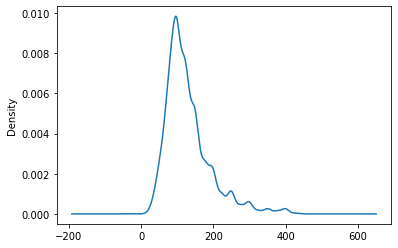

In [3]:
df_bnb['price'].plot.density()

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [4]:
matr_corr = df_bnb.corr()
matr_corr

accommodates  bathrooms  bedrooms  guests_included  \
accommodates             1.000000   0.342195  0.684226         0.495278   
bathrooms                0.342195   1.000000  0.365951         0.228522   
bedrooms                 0.684226   0.365951  1.000000         0.397340   
guests_included          0.495278   0.228522  0.397340         1.000000   
host_listings_count      0.035877   0.061330  0.002439        -0.027165   
latitude                 0.019741   0.014002  0.002976         0.012679   
longitude                0.108009   0.054273  0.093538         0.067807   
minimum_nights           0.008339   0.008710  0.028415         0.000536   
number_of_reviews       -0.031397  -0.030784 -0.096479         0.063316   
distance_centre          0.052256   0.011396  0.105061         0.024110   
instant_bookable         0.001548   0.019624 -0.055236        -0.020698   
entire_home              0.249384   0.018378  0.242817         0.123286   
private_room            -0.249088  -0.015951 -0.239698        -0.120377   
shared_room             -0.012872  -0.016196 -0.030479        -0.023878   
price                    0.552183   0.283759  0.517237         0.338739   

                     host_listings_count  latitude  longitude  minimum_nights  \
accommodates                    0.035877  0.019741   0.108009        0.008339   
bathrooms                       0.061330  0.014002   0.054273        0.008710   
bedrooms                        0.002439  0.002976   0.093538        0.028415   
guests_included                -0.027165  0.012679   0.067807        0.000536   
host_listings_count             1.000000  0.011374   0.007864        0.012551   
latitude                        0.011374  1.000000  -0.130823       -0.008551   
longitude                       0.007864 -0.130823   1.000000        0.008336   
minimum_nights                  0.012551 -0.008551   0.008336        1.000000   
number_of_reviews              -0.044428  0.042507  -0.010590       -0.019435   
distance_centre                -0.049033 -0.574523   0.068103        0.000555   
instant_bookable                0.205426  0.018967   0.030362       -0.019693   
entire_home                     0.041292  0.020318  -0.007145        0.044669   
private_room                   -0.040185 -0.020974   0.004975       -0.043631   
shared_room                    -0.008841  0.003260   0.014071       -0.008554   
price                           0.109141  0.027922   0.035887        0.007708   

                     number_of_reviews  distance_centre  instant_bookable  \
accommodates                 -0.031397         0.052256          0.001548   
bathrooms                    -0.030784         0.011396          0.019624   
bedrooms                     -0.096479         0.105061         -0.055236   
guests_included               0.063316         0.024110         -0.020698   
host_listings_count          -0.044428        -0.049033          0.205426   
latitude                      0.042507        -0.574523          0.018967   
longitude                    -0.010590         0.068103          0.030362   
minimum_nights               -0.019435         0.000555         -0.019693   
number_of_reviews             1.000000        -0.069880          0.081796   
distance_centre              -0.069880         1.000000         -0.006114   
instant_bookable              0.081796        -0.006114          1.000000   
entire_home                  -0.261675        -0.092336         -0.121355   
private_room                  0.263597         0.091778          0.121302   
shared_room                  -0.000648         0.007612          0.005692   
price                        -0.088437        -0.204698         -0.004410   

                     entire_home  private_room  shared_room     price  
accommodates            0.249384     -0.249088    -0.012872  0.552183  
bathrooms               0.018378     -0.015951    -0.016196  0.283759  
bedrooms                0.242817     -0.239698    -0.030479  0.517237  
gu

In [5]:
## Creamos el nuevo dataframe pedido
lab = list(df_bnb.columns.values)
dic = dict()
dic_target = {'price' : df_bnb['price']}
df_target = pd.DataFrame(dic_target)
col = matr_corr['price']
for i in range(len(lab)-1): ## la última columna es el precio
    if col.iloc[i] >= 0.2 or col.iloc[i] <= -0.2:
        dic[lab[i]] = df_bnb[lab[i]]
df_corr = pd.DataFrame(dic)
df_corr


accommodates  bathrooms  bedrooms  guests_included  distance_centre  \
0                 4        2.0       2.0                1         3.279483   
1                 4        1.0       2.0                2         5.951843   
2                 2        1.0       1.0                1         2.601055   
3                 2        1.0       1.0                1         1.095138   
4                 2        1.0       1.0                1         0.844491   
...             ...        ...       ...              ...              ...   
14993             2        1.0       1.0                1         1.815773   
14994             4        1.0       2.0                1         5.687407   
14995             2        1.0       1.0                1         1.620395   
14996             3        1.0       1.0                1         1.777881   
14997             2        1.0       1.0                1         2.619788   

       entire_home  private_room  
0                1             0  
1                1             0  
2                1             0  
3                0             1  
4                1             0  
...            ...           ...  
14993            1             0  
14994            1             0  
14995            1             0  
14996            1             0  
14997            1             0  

[14998 rows x 7 columns]

In [6]:
df_corr.describe()

accommodates     bathrooms      bedrooms  guests_included  \
count  14998.000000  14998.000000  14998.000000     14998.000000   
mean       2.880317      1.116215      1.390919         1.499333   
std        1.298492      0.343442      0.839649         0.940643   
min        1.000000      0.000000      0.000000         1.000000   
25%        2.000000      1.000000      1.000000         1.000000   
50%        2.000000      1.000000      1.000000         1.000000   
75%        4.000000      1.000000      2.000000         2.000000   
max       17.000000      8.000000     10.000000        16.000000   

       distance_centre   entire_home  private_room  
count     14998.000000  14998.000000  14998.000000  
mean          2.998582      0.777170      0.218562  
std           1.610995      0.416159      0.413285  
min           0.115801      0.000000      0.000000  
25%           1.948924      1.000000      0.000000  
50%           2.841338      1.000000      0.000000  
75%           3.577086      1.000000      0.000000  
max          11.842162      1.000000      1.000000

<AxesSubplot:ylabel='Density'>

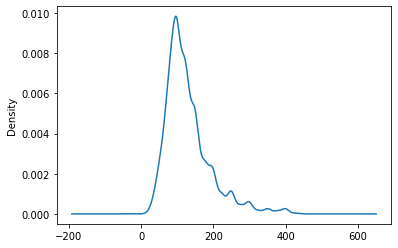

In [7]:
df_target['price'].plot.density()

<AxesSubplot:ylabel='Density'>

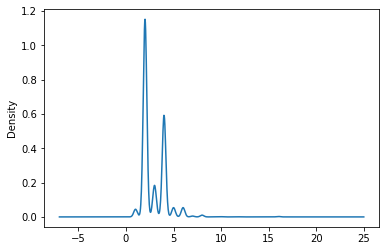

In [8]:
df_corr['accommodates'].plot.density()

<AxesSubplot:ylabel='Density'>

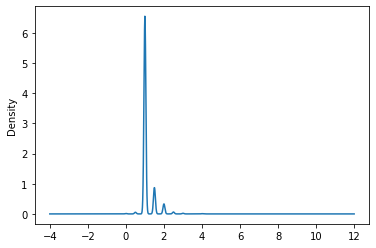

In [9]:
df_corr['bathrooms'].plot.density()

<AxesSubplot:ylabel='Density'>

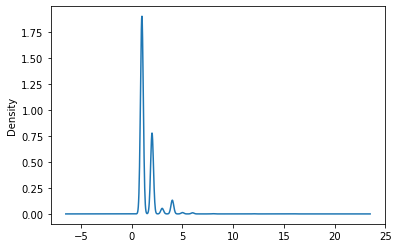

In [10]:
df_corr['guests_included'].plot.density()

<AxesSubplot:ylabel='Density'>

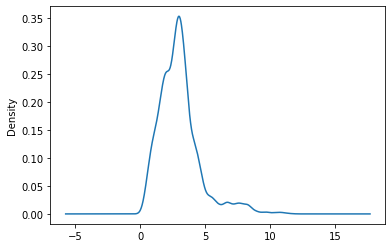

In [11]:
df_corr['distance_centre'].plot.density()

<AxesSubplot:ylabel='Density'>

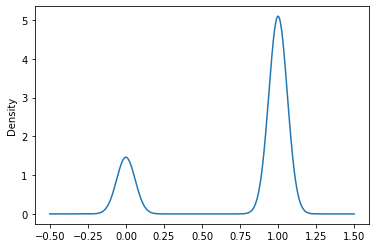

In [12]:
df_corr['entire_home'].plot.density()

<AxesSubplot:ylabel='Density'>

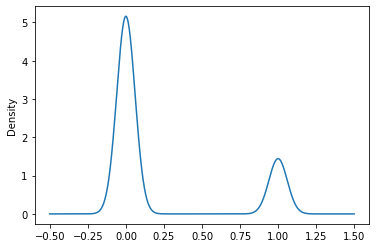

In [13]:
df_corr['private_room'].plot.density()

## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

In [14]:
min_max_scaler = sk.MinMaxScaler()
standard_scaler = sk.StandardScaler()

def minmax(my_df):
    arr = my_df.values
    res = min_max_scaler.fit_transform(arr)
    return res

def stdscaler(my_df):
    arr = my_df.values
    res = standard_scaler.fit_transform(arr)
    return res

In [17]:
## Escogemos normalizar porque las distribuciones no son normalmente distribuidas
fit_df_corr = minmax(df_corr)
fit_df_target = minmax(df_target)

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [27]:
cv_scores_mean = list()
cv_scores_std = list()

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1,7)
for regul_param in regul_param_range:
    mlp = MLPRegressor(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=random_state)
    

    scores = cross_val_score(mlp, fit_df_corr, fit_df_target, cv=7,scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(-1*scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([0.012555170787264222,
  0.0120066716130226,
  0.011866738184199711,
  0.011839927698056965,
  0.011822732578779081,
  0.011836648419462645],
 [0.0004931279642264189,
  0.000427451909619449,
  0.0004786931062705411,
  0.0004903045354507649,
  0.0005077710515591293,
  0.0004970851067557622])

In [28]:
cv_scores_mean_net2 = list()
cv_scores_std_net2 = list()

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    mlp2 = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=random_state)
    

    scores2 = cross_val_score(mlp2, fit_df_corr, fit_df_target, cv=7,scoring='neg_mean_squared_error')
    
    cv_scores_mean_net2.append(-1*scores2.mean())
    cv_scores_std_net2.append(scores2.std())

cv_scores_mean_net2, cv_scores_std_net2

([0.01275466440849973,
  0.012025596368935933,
  0.012104711441788285,
  0.012041707670724098,
  0.012039452950048485,
  0.012040108449952553],
 [0.0006214066647045909,
  0.0006192940927841758,
  0.00043708961381322246,
  0.0004629674313375844,
  0.00041895533482160446,
  0.0004621315468618569])

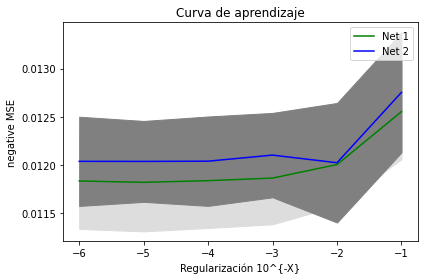

In [29]:
## Construímos la curva de aprendizaje de ambas redes
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Net 1")
plt.plot(np.log10(regul_param_range), cv_scores_mean_net2, color="b", label="Net 2")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
lower_limit2 = np.array(cv_scores_mean_net2) - np.array(cv_scores_std_net2)
upper_limit2 = np.array(cv_scores_mean_net2) + np.array(cv_scores_std_net2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")
plt.fill_between(np.log10(regul_param_range), lower_limit2, upper_limit2, color="gray")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [35]:
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=random_state)
    

predicts_scaled = cross_val_predict(mlp, fit_df_corr, fit_df_target, cv=10)


predicts=min_max_scaler.inverse_transform(predicts_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [104986, 14998]

In [31]:
errors = np.abs(df_corr_target - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(boston['target'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

NameError: name 'boston' is not defined